---
title: "Summary of Python features"
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
jupyter: python3
---

## Basics
- Python can run interactively (as in this __Jupyter notebook/lab__) or noninteractively through a script file (via command `python xxx.py`).
- Python is a dynamically typed language, which means you don't declare the type of variables at the beginning, and the variables get their type from their value. Eg. `x = 0.5` creates a float variable.
- Many functions can be obtained by importing standard library modules. Eg. the square root function `sqrt` can be obtained by `import math` and then be used as `math.sqrt(x)`. 
- Some Pythonic expressions: `x += 1` means 
`x = x+1`. Exchanging values of variables  `x, y = y, x`. 

## Control Flow
- Run code under conditions: 
```python
    if (x != 0):
        print("x is nonzero")
```
- Note that the __indentation__ after the colon ":" is important.
- Two types of loop (`for` loop is recommended in practice): 
```python
    while (condition):
        ...
```
```python
    for i in range(3):
        ...
```
- `range(n)` gives the integers from `0` to `n-1`. `range(m,n,i)` gives the integers from `m` to `n-1` in steps of `i`.

In [1]:
#| output: asis
for ii in range(0,10,2):
    print(ii, end = " ")  # end = " " means after printing ii, we put a space at the end (no new lines)

0 2 4 6 8 

## Data Structures
### Lists 
A list is a container of elements (of any type), and the number of elements can grow. For example, `zs = [5, 1+2j, -2.0]` is a list. `zs[0]` is the first element and `zs[-1]` is the last one. We can change the element in the list, for example, by `zs[1]=9`, which will replace `1+2j` in the original list. We can also introduce a new element at the end of the list, by the `append()` command. See the following example:

In [17]:
xs = []
for i in range(20):
    xs.append(0.1*i)
print(xs) # there can be numerical errors

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001]


If we add two lists `zs = xs + ys`, we concatenate the lists `xs` and `ys` into `zs`. Similarly, `xs = 4 * [0]` simplies gives `xs = [0,0,0,0]`. 

__Slicing__ is an important feature. `xs[2:5]` means we extract a smaller list consisting `xs[2]` up to `xs[4]` (exclude `xs[5]`). Further, we can use `ws[m:n:i]`, which means we extract `ws[m]` up to but not include `ws[n]` where the index goes in steps of `i`. 

__Copy list__: if we assign an old list `xs` to a new list `ys`, via `ys = xs`, then `ys` will just be another name for the old list. See the following example:

In [2]:
xs = [1,2,3]
ys = xs
ys[0] = 7
print(xs) # see the values of the old list is modified

[7, 2, 3]


On the other hand, when you slice a list, you get a __new__ list. Particularly, `ys = xs[:]` creates a new list `ys`, which is different from the old list `xs`. See the following example:

In [3]:
xs = [1,2,3]
ys = xs[:]
ys[0] = 7
print(xs)
print(ys)

[1, 2, 3]
[7, 2, 3]


__Tuples__ can be regarded as _immutable_ lists, which means they can neither change nor grow. We use _parentheses_ instead of square brackets for the tuples, `xs = (1,2,3)`, or sometimes even without the parentheses, `xs = 1,2,3`. After it is created, we cannot change its values. If you type `xs[0] = 3`, you will get an error. You do have access to the elements in the tuples. Whey you type `print(xs[0])`, you will get `1`.

__Strings__ can be viewed as a sequence. For example, `name = "Mary"`, then `name[-1]` will be the character `y`. (Either double or single quotation marks can be used.) Strings are also _immutable_. You can use `+` to concatenate two strings. A useful function tha|t acts on the strings is `format()`: it uses _positional_ arguments, numbered starting from `0`, within curly braces. See the following example

In [22]:
x,y =123.3, -2.8
print("{0} {1}".format(x,y))
print("{0:.10f}, {1}".format(x,y))

123.3 -2.8
123.3000000000, -2.8


In the above example, the `.10f` after the colon means we format the first variable `x` as a float number with ten digits after the decimal point. 

__Dictionaries__ are also called associative arrays in computer science (or maps in C++). They are _key-value_ pairs. For example, we can introduce `htow = {1.4 : 30.1, 1.5 : 42.3, 1.6 : 48}`. Here, `1.4`, `1.5`, and `1.6` are keys. `30.1`, `42.3` and `48` are the corresponding values. One can access the values via the keys, via e.g. `htow[1.5]`, which gives `42.3`. Note that the keys and values can be strings, floats etc. 

## User-Defined Functions
In python, function are defined using the following code block, which sum from 1 up to some integer. 

In [26]:
def sumofints(nmax):
    val = sum(range(1,nmax+1))
    return val
sumofints(10)

55

Sometimes it is also useful to introduce default parameters in a function. For example, we can set the default `nmax` to be `10`. When we omit the parameter, the function runs with its default parameters. See below:

In [27]:
def sumofints2(nmax = 10):
    val = sum(range(1,nmax+1))
    return val
sumofints2()

55

Another way to define a function is via `lambda` function. See the following example: 

In [30]:
f = lambda x,y: x**2 + y**2
# define a function f(x,y)
f(3,4)

25

In python, function can be passed to other functions. For example, we can define a function that numerically calculate the derivative of a function. See the following example

In [36]:
g = lambda x: x**3 # compute x cube
def der(f, x, h=0.01):
    return (f(x+h) - f(x))/h
# Compute the derivative of x^3 at x=1. 
# The exact result is 3. 
print(der(g,1))
print(der(g,1,1e-5)) # choose a smaller h


3.0301000000000133
3.000030000110953


## Core-Python Idioms
### List Comprehensions
We can replace the previous example that creates a list of the form `0.1*i` for i runs from 0,1,... up to 19. This can be done via `xs = [0.1*i for i in range(20)]`, this is called _list comprehension_. 
How do we double each elements in `xs`? Note that we __cannot__ use `2*xs`, because this simply concatenate two `xs` lists. The can be done in the following example: 

In [40]:
xs = [0.1 * i for i in range(20)]
ys = [2*x for x in xs]
print(ys)

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003]


We can even add conditions in list comprehensions. 

In [47]:
zs = [2*x for x in xs if x>1]
# This only doubles the elements greater than 1.
print(zs)

[2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003]


### Iterating Idiomatically
__One list__ The conventional way to iterate the list xs:
```python
for i in range(len(xs)):
    print(xs[i])
```
The pythonic way is
```python
for x in xs:
    print(x)
```
Sometimes, you may also want to get the index i when iterating the list. See the following example

In [8]:
xs = [0.1*i for i in range(5)]
for i,x in enumerate(xs):
    print("{0} {1:.1f}".format(i,x))

0 0.0
1 0.1
2 0.2
3 0.3
4 0.4


__Two lists__ If `xs` and `ys` are of the same lenth, we can use the `zip()` command to simplify the following non-pythonic function.
```python
# Non-pythonic way
for i in range(len(xs)):
    print(xs[i],ys[i])
```

In [10]:
# Pythonic way
xs = [1,2,3]
ys = [4,5,6]
for x,y in zip(xs,ys):
    print(x,y) 

1 4
2 5
3 6


__Dictionaries__ We can use `.items()` method of dictionaries to loop over all key-value pairs in the dictionary. See the following example

In [11]:
name_age = {"Alice": 12, "Bob": 14, "Sam": 11}
for name,age in name_age.items():
    print("{0} {1}".format(name,age))

Alice 12
Bob 14
Sam 11


__For-else__
You can follow the `for` loop by an `else`. This is counterituitive but can be very helpful. 
The way this works is that the `for` loop is run as usual: if no `break` is encountered during execution of the `for` block, then control proceeds to the `else` block. If
a `break` is encountered during execution of the `for` block, then the `else` block is not run. See the following example.

In [18]:
def look_up_age(target,name_age):
    for name,age in name_age.items():
        if name==target:
            val = age
            break
    else:
        val = None
    return val
name_age = {"Alice":12, "Bob":14, "Sam":11}
print(look_up_age("Sam", name_age))
print(look_up_age("Jack", name_age))

11
None


## Basic Plotting with matplotlib
The Python ecosystem gives us the option of visualizing relationships between numbers via `matplotlib`, a plotting library (i.e., not part of core Python) which can produce quality figures. Specifically, we use the `matplotlib.pyplot` module to produce figures. 

If you want to learn more, please to visit [Matplotlib's webpage](https://matplotlib.org/), especially the [Tutorial page](https://matplotlib.org/stable/tutorials/index.html). 

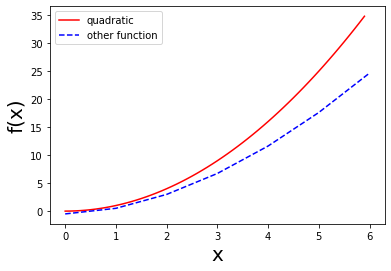

In [33]:
import matplotlib.pyplot as plt # plt is the short name for matplotlib.pyplot

def plotex(cxs,cys,dxs,dys):
    plt.xlabel('x', fontsize=20)
    plt.ylabel('f(x)', fontsize=20)
    plt.plot(cxs, cys, 'r-', label='quadratic')
    plt.plot(dxs, dys, 'b--', label='other function')
    plt.legend()
    plt.show()

cxs = [0.1*i for i in range(60)]
cys = [x**2 for x in cxs]
dxs = [i for i in range(7)]
dys = [x**1.8 - 0.5 for x in dxs]
plotex(cxs, cys, dxs, dys)

## Project: Visualiznig Electric Fields
We shall use `matplotlib` to visualize a vector field, by drawing field lines for the electric field produced by several point charges.

### Electric Field of a Distribution of Point Charges
Let us recall the _Coulomb's law_: the force on a test charge $Q$ located at point $P$ (at position $\boldsymbol{r}$), coming from a single point charge $q_0$ located at $\boldsymbol{r}_0$ is given by:
$$
\boldsymbol{F}_0 = k\frac{q_0 Q}{(\boldsymbol{r} - \boldsymbol{r}_0)^2} \frac{\boldsymbol{r} - \boldsymbol{r}_0}{|\boldsymbol{r} - \boldsymbol{r}_0|}
$$
where the Coulomb constant $k = 1/(4\pi \epsilon_0)$ in SI units. 

The electric field $\boldsymbol{E}_0$ is the ratio of the force $\boldsymbol{F}_0$ with the test charge $Q$ in the limit $Q\to 0$. In practice, this gives
$$
\boldsymbol{E}_0(\boldsymbol{r}) = kq_0 \frac{\boldsymbol{r} - \boldsymbol{r}_0}{|\boldsymbol{r} - \boldsymbol{r}_0|^3}.
$$

If we have more than one point charge, we could apply the _principle of superposition_, by summing over the electric fields created by point charges $q_0, q_1, \dots, q_{n-1}$ 
$$
\boldsymbol{E}(\boldsymbol{r}) = \sum_{i = 0}^{n-1} \boldsymbol{E}_i(\boldsymbol{r}) 
= \sum_{i=0}^{n-1} kq_i \frac{\boldsymbol{r} - \boldsymbol{r}_0}{|\boldsymbol{r} - \boldsymbol{r}_0|^3}.
$$ {#eq-electric_field} 

Note that the electric field is a vector quantity: at any point in space it has a magniude and a direction. One way of visualizing vector fields consists of drawing _field lines_,namely imaginary curves that help us keep track of the direction of the field. More specifically, the tangent of a field line at a given point gives us the direction of the electric field at that point. Field lines do not cross; they start at positive charges ("sources") and end at negative charges ("sinks").

### Plotting Field Line
We have two tasks: 

1. We need to find the electric field (vector) at several points near the charges (@eq-electric_field).
2. We need to plot field lines in such a way that we can physically interpret what is happening. 

We shall only consider the problem with only __two__ point charges of equal magnitude and opposite sign. We restrict ourselves to two dimensions. 

Below is the python implementation, where we take the Coulomb constant $k=1$ for simplicity. We start by importing `numpy` and `matplotlib`. We also import the square root function and the `deepcopy()` function, which can create a distinct list-of-lists. 

The function `makefield()` takes in two liss, `xs` and `ys`, corresponding to the coordinates at which we wish to evaluate field. We also need to store the $\boldsymbol{r}_i$ at which the point charges are located. 

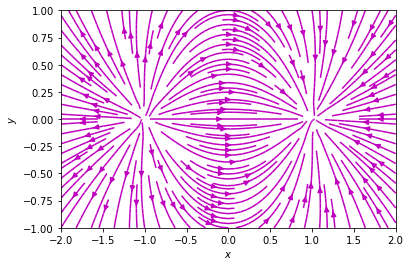

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from copy import deepcopy

def makefield(rlist, qtopos):
    '''
    This function computes the electric field vector (Ex, Ey) at different locations r=(x,y).
    Here, the inputs are: 
    rlist = [[x1,y1],[x2,y2],...] for the locations at which we want to calculate the electric fields.
    qtopos = [[q1, (posx, posy)], [q2, (posx, posy)] ...] 
    corresonding to locations r1 = (x1,y1), r2 = (x2,y2), ...
    '''
    # First, create an empty list
    Es = []
    for r in rlist:
        # loop over all locations at which the electric fields will be evaluated
        x,y = r
        # extract the x and y coordinate
        Ex = 0
        Ey = 0
        # set initial electric field strength to zero
        for q_pos in qtopos:
            q,pos = q_pos
            # loop over all point charge and position pairs:
            posx, posy = pos
            R = sqrt((x - posx)**2 + (y - posy)**2)
            # Calculate the distance
            Ex += q*(x - posx)/R**3
            Ey += q*(y - posy)/R**3
            # Add up contribution to the electric field from each point charge
        Es.append(np.array([Ex,Ey])) # append the electric field np.array([Ex, Ey]) into the list Es
    return Es # return the list of electric fields at all locations in rlist

def plotfield(boxlx,boxly, n, m, qtopos= [[1,(-1,0)], [-1,(1,0)]]):
    '''
    plot the electric field in a region [-boxlx, boxlx] x [-boxly, boxly], 
    with n x m grid points at which the electric field shall be evaluated.
    The default value for qtopos = [[1,(-1,0)],[-1,(1,0)]]
    '''
    # all possible x coordinates, from -boxl to boxl, with n points 
    xlist = [-boxlx + i*2*boxlx/(n-1) for i in range(n)]
    # all possible y coordinates
    ylist = [-boxly + i*2*boxly/(m-1) for i in range(m)]
    rlist = [[x,y] for y in ylist for x in xlist]
    # rlist = [[x1,y1],[x2,y1],[x3,y1],...,
    #          [x1,y2],[x2,y2],[x3,y2],...,
    #          ...,
    #          [x1,yn],[x2,yn],[x3,yn],...]
    Es = np.array(makefield(rlist,qtopos))
    # convert List of electric fieds into a 2d numpy array
    # Es= np.array([E11,E21,E31,...,
    #               E12,E22,E32,...,
    #              ...,
    #               E1n,E2n,E3n,...])
    # here E11 means E(x=x1,y=y1) etc.
    xlist=np.array(xlist) 
    # convert xlist from list to np.array(), which is required
    # in plt.streamplot()
    ylist=np.array(ylist)
    Exs=np.reshape(Es[:,0],(m,n))
    # Es[:,0] is a 1D numpy array
    # Es[:,0] = np.array([Ex11,Ex21,Ex31,...,
    #                     Ex12,Ex22,Ex32,...,
    #                      ...,
    #                     Ex1n,Ex2n,Ex3n,...])
    # here Ex11 means the x component Ex(x=x1,y=y1) etc.
    # Using np.reshape(Es[:,0], (dim1, dim2)), one can reshape the 1D 
    # array Es[:,0] into a 2d array, of dim1 rows and dim2 columns. 
    Eys=np.reshape(Es[:,1],(m,n))
    plt.streamplot(xlist, ylist, Exs, Eys, density=1.5, color='m')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()
  
plotfield(boxlx = 2, boxly = 1,n = 40, m = 20)

Note that the `plt.streamplot()` is used to draw streamlines of a vector flow, one can see its [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html).
Alternatively, you can type the following `help()` function to print out the usage of this function.

In [5]:
help(plt.streamplot)

Help on function streamplot in module matplotlib.pyplot:

streamplot(x, y, u, v, density=1, linewidth=None, color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1, transform=None, zorder=None, start_points=None, maxlength=4.0, integration_direction='both', *, data=None)
    Draw streamlines of a vector flow.
    
    Parameters
    ----------
    x, y : 1D/2D arrays
        Evenly spaced strictly increasing arrays to make a grid.  If 2D, all
        rows of *x* must be equal and all columns of *y* must be equal; i.e.,
        they must be as if generated by ``np.meshgrid(x_1d, y_1d)``.
    u, v : 2D arrays
        *x* and *y*-velocities. The number of rows and columns must match
        the length of *y* and *x*, respectively.
    density : float or (float, float)
        Controls the closeness of streamlines. When ``density = 1``, the domain
        is divided into a 30x30 grid. *density* linearly scales this grid.
        Each cell in the grid can have, at mos

One can see that `plt.streamplot()` expects inputs `x,y,u,v` as 1D or 2D (numpy) arrays. That's the reason we need to import `numpy` and convert Lists to numpy arrays. In the following, we will brifely remind you some numpy idioms. More functions of numpy arrays will be introduced later in this course. You can also visit [Numpy website](https://numpy.org/learn/) to learn by yourself. 

## Numpy idioms
Numpy arrays are similar to python list. Python lists are often _homogeneous_, which means they contain elements of only one type. Thus, it makes more sense to carry out tasks using a _homogenous_, _fixed-length_ container. Numpy arrays are exactly such objects that do this job: it is fast and space-efficient. It also allows us to avoid having to write loops, via so-called _vectorization_.
The standard way of importing numpy arrays into a python program is via

In [33]:
import numpy as np

In fact, lists are similar to 1D arrays in numpy, and can be regarded as vectors. 
Lists of lists are similar to 2D arrays in numpy, and they can be regarded as matrices.  
One can even convert between the two easily, see below. 

In [87]:
xlist = [1.,2.,3.]
xs = np.array(xlist)
print(type(xs),xs)

y2d_array = np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])
y2dlist = y2d_array.tolist()
print(type(y2dlist),y2dlist)

<class 'numpy.ndarray'> [1. 2. 3.]
<class 'list'> [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]


In [80]:
xs.tolist()

[1, 2, 3]

Below we shall see the great acceleration when we compute elementwise multiplication using numpy arrays. 

In [67]:
def elementwise_multiplication(xlist,ylisg):
    return [x*y for x,y in zip(xlist,ylist)]

# create a random 1D array of length 100
len_n = 1000000
xs = np.random.rand(len_n)
ys = np.random.rand(len_n)

# xlist, ylist are the corresponding lists for xs and ys
xlist = list(xs)
ylist = list(ys)

# perform elementwise multiplication with lists
# One can use Jupyter's built-in magic '%time' to
# measure the running time for a single line of code.
print("Using python lists:")
%time zlist = elementwise_multiplication(xlist,ylist)
print("Using numpy array with vectorization:")
%time zs = xs*ys

Using python lists:
CPU times: total: 62.5 ms
Wall time: 111 ms
Using numpy array with vectorization:
CPU times: total: 0 ns
Wall time: 3.01 ms


__Slicing arrays__
Consider a 2D array `A`. One can access its first row via `A[0,:]`, and its first column via `A[:,0]`. Note that the row or column indices run from zero. 

In [91]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A[0,:])
print(A[:,0])

[1 2 3]
[1 4 7]


__Reshape  arrays__
Sometimes it is very useful to reshape numpy arrays. For example, we can reshape a $3 \times 2$ 2D array into a 1D array of length $6$, and vice versa. See the following example. 

In [93]:
x1d = np.array([[1,2,3,4,5,6]])
x2d = np.reshape(x1d,(3,2))
print(x2d)
print(x2d.flatten())

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]


In the above example, when we reshape the 1D array into a 2D array, the column (second) indices increase faster than the row (first) indices. This is known as the _C-type_ ordering, which in general requires the last index in an ndarray changes the fastest. (On the contrary, in other programming languages, such as Matlab and Fortran, the first index changes the fastest. This is known as the _Fortran-type_ ordering.)


## Homework Problems

Please submit your codes in a jupyter notebook *.ipynb.

1. Iterate through a list `xs` in reverse, printing out both the index (which will be decreasing) and each element itself.
2. Try to reproduce the electric field plot shown below with 4 point charges, at (1,0), (-1,0), (0,1), (0,-1). (You should first determine the sign of the charges, assusming they all have the same magnitude.)
![Electric field](homework2.png)